<div style="color: red; font-size: 30px; text-align: center; font-weight: bold;">
    Online Payment Fraud Detection
</div>

Introduction :

online payment transactions have become an integral part of everyday life. However, with the rise in online transactions comes the increased risk of fraudulent activities. Online payment fraud poses significant challenges to financial institutions, merchants, and consumers alike, leading to financial losses, reputational damage, and compromised security.

To address these challenges, machine learning techniques have emerged as powerful tools for detecting and preventing online payment fraud. By leveraging vast amounts of transactional data, machine learning models can identify patterns, anomalies, and suspicious behavior indicative of fraudulent activities in real-time.

*************

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Online Payment.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


Let's see, whether our dataset has null values or not

In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

So this dataset does not have any null values.

 Before moving forward, now, let’s have a look at the type of transaction mentioned in the dataset:

In [9]:
data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [12]:
import plotly.express as px

# Get the distribution of values in the column
value_counts = data['type'].value_counts()

# Plot a pie chart to visualize the distribution
fig = px.pie(names=value_counts.index, 
             values=value_counts.values, 
             title=f"Distribution of {'type'}")

# Show the plot
fig.show()

let’s have a look at the correlation between the features of the data with the isFraud column:

In [14]:
# Checking correlation
correlation = data.corr()
correlation

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030,NaN
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862,NaN
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829,NaN
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438,NaN
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552,NaN
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495,NaN
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
correlation["isFraud"].sort_values(ascending=False)

isFraud           1.000000
amount            0.128862
step              0.045030
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

**************

In [19]:
# Categorical columns

data.select_dtypes(include=['object']).columns.tolist()

['type', 'nameOrig', 'nameDest']

we can transform the 'type' categorical features into numerical.

In [20]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})

************

We will also transform the values of the 'isFraud' column into No Fraud and Fraud labels to have a better understanding of the output:

In [21]:
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})

In [22]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


***************

# Online Payments Fraud Detection Model

In [25]:
# splitting the data
from sklearn.model_selection import train_test_split
X = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [26]:
# training a machine learning model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. LogisticRegression


In [27]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

# Train the model on the training data
model_lr.fit(X_train, y_train)

# Predict the target labels for the test data
y_pred_lr = model_lr.predict(X_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [30]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

# Print classification report
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9992465965715376
              precision    recall  f1-score   support

       Fraud       0.87      0.35      0.50       224
    No Fraud       1.00      1.00      1.00    209491

    accuracy                           1.00    209715
   macro avg       0.93      0.67      0.75    209715
weighted avg       1.00      1.00      1.00    209715



In [32]:
accuracy_percent = accuracy_lr * 100

print("Accuracy:", accuracy_percent, "%")

Accuracy: 99.92465965715375 %


Accuracy of logistic regression model is 99.92%%

**************

2. DecisionTreeClassifier()

In [34]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
# Predict the target labels for the test data
y_pred_dt = model_dt.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

# Print classification report
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.9994277948644589
              precision    recall  f1-score   support

       Fraud       0.75      0.69      0.72       224
    No Fraud       1.00      1.00      1.00    209491

    accuracy                           1.00    209715
   macro avg       0.88      0.84      0.86    209715
weighted avg       1.00      1.00      1.00    209715



In [38]:
accuracy_percent = accuracy_dt * 100

print("Accuracy:", accuracy_percent, "%")

Accuracy: 99.94277948644589 %


Accuracy of DecisionTreeClassifier is 99.94. So we will select DecisionTreeClassifier for our project.

# Final Check

let’s classify whether a transaction is a fraud or not by feeding about a transaction into the model:

In [40]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model_dt.predict(features))

['Fraud']


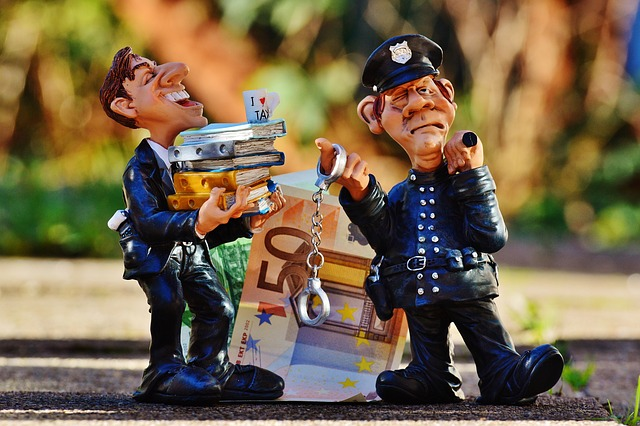

Summary :

So this is how we can detect online payments fraud with machine learning using Python. The online payment fraud detection project represents a critical component of efforts to combat cybercrime and safeguard the integrity of digital payment systems. By leveraging the capabilities of machine learning and data analytics, financial institutions and merchants can effectively detect and prevent fraudulent transactions, promoting a secure and trustworthy online payment ecosystem for all stakeholders involved.

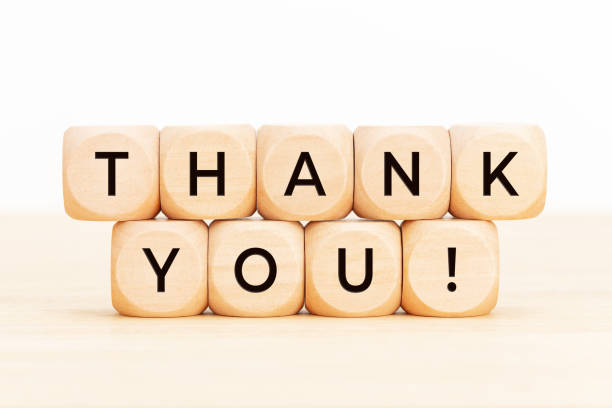